In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sp  ## for lambertw
import sympy as sym ## for symbolic computation

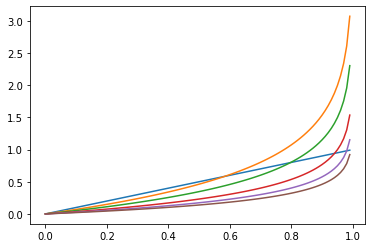

In [2]:
z = np.linspace(0, 0.99, 100)
plt.plot(z,z)  ## 1-to-1 line (lhs of equation)
R0_vec = [1.5,2,3,4,5]
for i in range(len(R0_vec)):
    rhs = -1/R0_vec[i]*np.log(1-z)
    plt.plot(z,rhs)

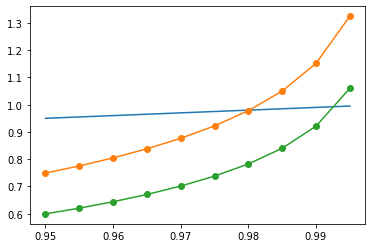

In [3]:
## now zoom in to a narrower range of larger R0 values
## let upper limit of z get closer to 1
z = np.arange(0.95, 0.995, 0.005)
plt.plot(z,z)  ## 1-to-1 line (lhs of equation)
R0_vec = [4,5]
for i in range(len(R0_vec)):
    rhs = -1/R0_vec[i]*np.log(1-z)
    plt.plot(z,rhs, 'o-')

In [8]:
## solve final size eqn symbolically
z, R0 = sym.symbols('z R0')
eq = sym.Eq(z,-1/R0*sym.log(1-z))
print(eq)
sym.solve(eq, R0)  ## easy/boring
fs = sym.solve(eq, z)
print(fs)
## https://docs.sympy.org/latest/modules/numeric-computation.html
## numerical evaluation
print(fs[0].evalf(subs={R0: 2.0}))
## can evaluate at higher precision if we want
print(fs[0].evalf(50,subs={R0: 2.0}))


Eq(z, -log(1 - z)/R0)
[(R0 + LambertW(-R0*exp(-R0)))/R0]
0.796812130020020
0.79681213002002004616152093793758012089450121240943


In [5]:
## use scipy.special.lambertw to evaluate this expression
## numerically
## sp.lambertw returns a *complex* number (with real
##  part 0 in this case). float() works to discard the
##  imaginary part, but throws warnings. numpy.real()
##  is better ...
## float(sp.lambertw(2))
def finalsize(R0):
    return 1 + np.real(sp.lambertw(-R0*np.exp(-R0)))/R0
## finalsize(5)
print(finalsize(2.0))
## matches sympy value above (nearly)

0.7968121300200199


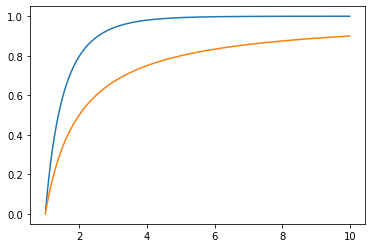

In [6]:
R0_vec = np.arange(1,10,0.01)
## use 'list comprehensions'
f_vec = [finalsize(R) for R in R0_vec]
## p^* = 1-1/R0 = critical control threshold
herdimm_vec = [1-1/R for R in R0_vec]
plt.plot(R0_vec,f_vec);
plt.plot(R0_vec,herdimm_vec);